# K Neighbors Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./dados/dados.csv') #Lendo os dados

In [2]:
#Declarando as variáveis:
X = df[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Chuva (mm)', 'Hora', 'Mês', 'Pto Orvalho Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)']]

y = df['Potência CA (W)']


#Separando em treino e teste:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=101) #10% dos dados são p/ teste

## Validação Cruzada

In [3]:
#Criando o modelo:
reg = KNeighborsRegressor(n_neighbors=9,weights='distance', p=2)

#Criando a pipeline do modelo:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), ('modelo', reg)                      
                    ])



#Declarando a Validação Cruzada:
cross_validation = KFold(n_splits=4, shuffle=True, random_state=101)

#Rodando a Validação Cruzada e calculando o RMSE
print('RMSE:', cross_val_score(pipeline, X_t, y_t, cv=cross_validation, scoring='neg_root_mean_squared_error').mean())

RMSE: -345.5843194133175


## Obtendo as métricas para os parâmetros escolhidos

In [4]:
#Separando em treino e validação:
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.3, random_state=101)


#Treinando o modelo:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_valid)


#Métricas de avalidação
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_valid, pred))
print('R²:', metrics.r2_score(y_valid, pred))

RMSE: 361.0340671538253
MAPE: 1.8226246075384216
R²: 0.8214035682232634


## Prevendo os dados de teste

In [41]:
#Normalizando os dados de entrada:
scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_t)
X_test_scaled = scaler.fit_transform(X_test)


#Treinando o modelo:
reg.fit(X_t_scaled, y_t)

#Fazendo a previsão:
pred = reg.predict(X_test_scaled)


#Avaliando o modelo:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))
print('R²:', metrics.r2_score(y_test, pred))

RMSE: 346.46089047281475
MAPE: 1.4602029315321772
R²: 0.8312510645309289


<AxesSubplot:xlabel='Valor Real', ylabel='Previsão'>

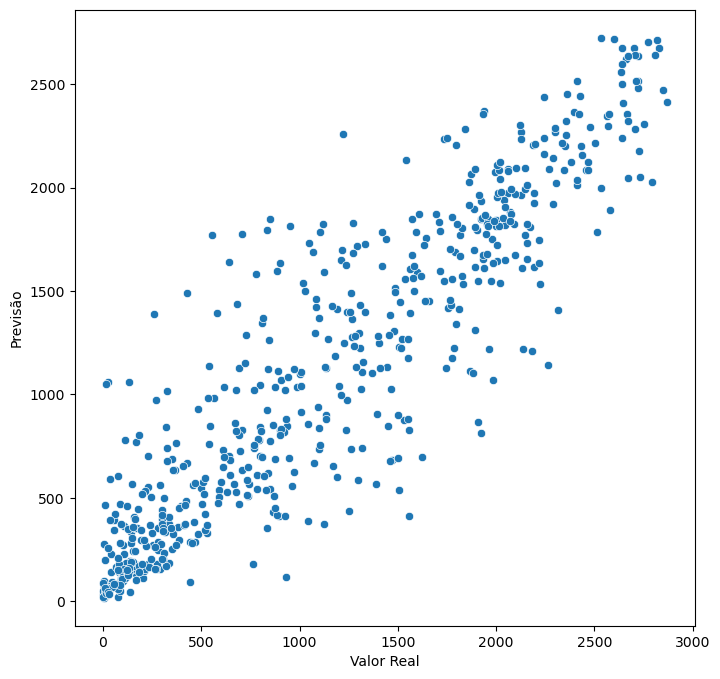

In [42]:
plt.figure(figsize=(8,8))
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
sns.scatterplot(y_test,pred)

In [43]:
pred_table = pd.DataFrame({'Valor': y_test, 'Previsão': pred, 'Erro': pred-y_test})

pred_table.head()

,Valor,Previsão,Erro
2989,1298.800000,584.033179,-714.766821
3644,2411.333333,2011.297489,-400.035845
3296,2173.416667,1808.431916,-364.984751
96,1222.000000,2259.711094,1037.711094
1884,1922.750000,1846.202226,-76.547774
4928,107.727273,136.495635,28.768363
2102,174.500000,174.138769,-0.361231
3789,120.583333,163.242840,42.659506
2464,10.800000,48.170066,37.370066
183,873.416667,1035.604601,162.187935


In [44]:
np.sqrt(metrics.mean_squared_error(y_test, pred))/(df['Potência CA (W)']).mean()

0.32118058507341213

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, pred))/(df['Potência CA (W)']).mean()